#### Importer les bibliothèques nécessaires :

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Charger le jeu de données à partir du fichier kc_house_data.csv :

In [3]:
data = pd.read_csv("./kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Field | Meaning
--- | ---
**id** | `a notation for a house`
**date** | `Date house was sold`
**price** | `Price is prediction target`
**bedrooms** | `Number of Bedrooms/House`
**bathrooms** | `Number of bathrooms/bedrooms`
**sqft_living** | `square footage of the home`
**sqft_lot** | `square footage of the lot`
**floors** | `Total floors (levels) in house`
**waterfront** | `House which has a view to a waterfront`
**view** | `Has been viewed`
**condition** | `How good the condition is Overall`
**grade** | `overall grade given to the housing unit, based on King County grading system`
**sqft_above** | `square footage of house apart from basement`
**sqft_basement** | `square footage of the basement`
**yr_built** | `Built Year`
**yr_renovated** | `Year when house was renovated`
**zipcode** | `zip code`
**lat** | `Latitude coordinate`
**long** | `Longitude coordinate`
**sqft_living15** | `Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area`
**sqft_lot15** | `lotSize area in 2015 (implies-- some renovations)`

#### Exploration du jeu de données :
Utilisez la fonction "describe" pour voir les percentiles et autres statistiques clés.

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* The dataset has a house where the house has 33 bedrooms.
* Maximum square feet is 13,450 where as the minimum is 290.
* ...

#### Which is the most common house (Bedroom wise) ?

Text(0, 0.5, 'Count')

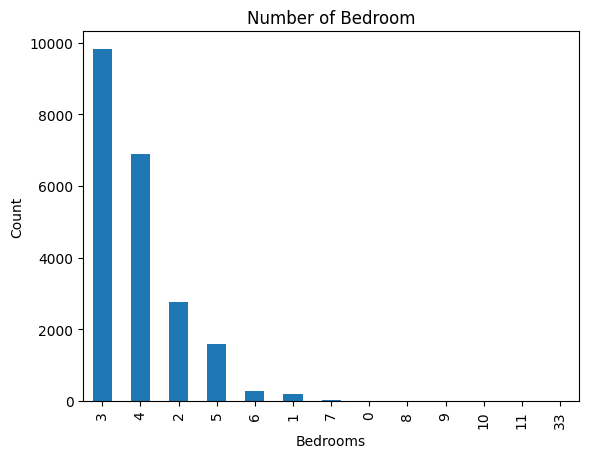

In [5]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title("Number of Bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("Count")

#### Visualizing the location of the houses based on latitude and longitude :

<Figure size 1000x1000 with 0 Axes>

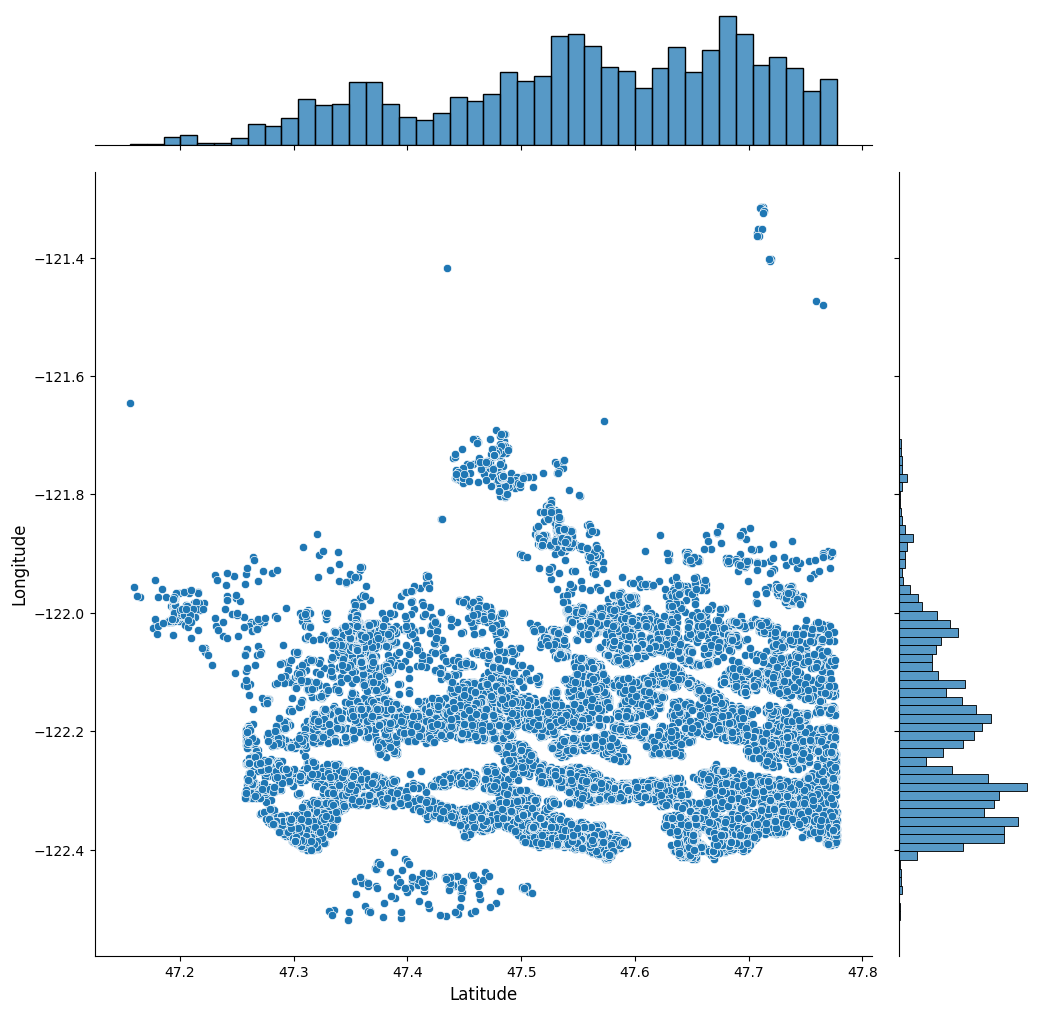

In [6]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

#### How common factors are affecting the price of the houses ?



1. Location :

Text(0.5, 1.0, 'Price vs Location of the area')

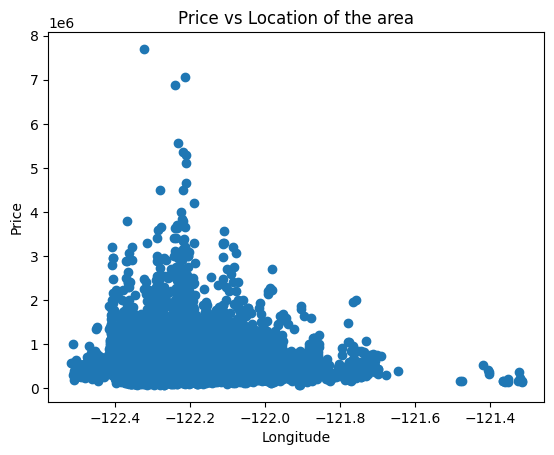

In [7]:
plt.scatter(data.long, data.price)
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

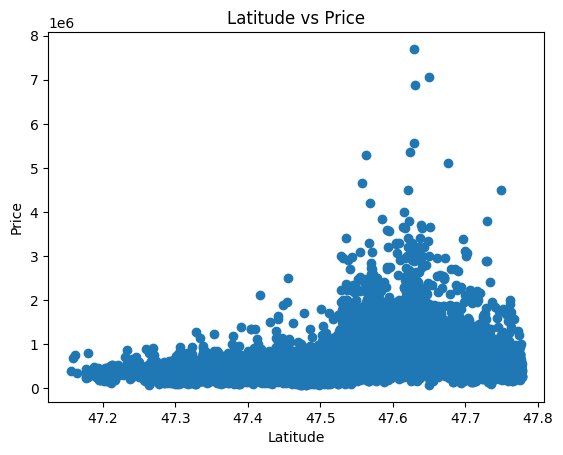

In [8]:
plt.scatter(data.lat, data.price)
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.title("Latitude vs Price")

2. Living area :

Text(0.5, 1.0, 'Price vs Square Feet')

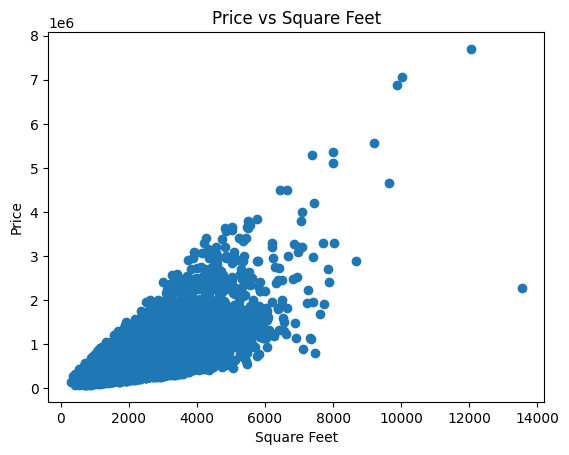

In [9]:
plt.scatter(data.sqft_living, data.price)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Price vs Square Feet")

3. Bedrooms :

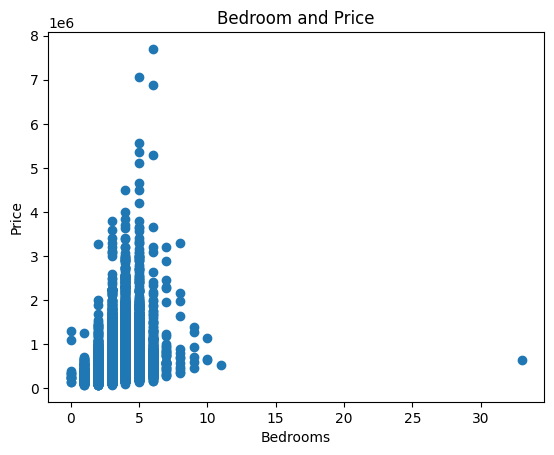

In [10]:
plt.scatter(data.bedrooms, data.price)
plt.title("Bedroom and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

4. Square Footage :

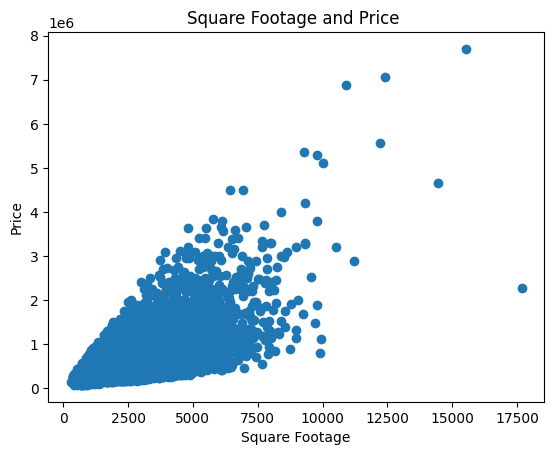

In [11]:
plt.scatter((data['sqft_living'] + data['sqft_basement']), data['price'])
plt.title("Square Footage and Price ")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.show()

5. View to a waterfront :

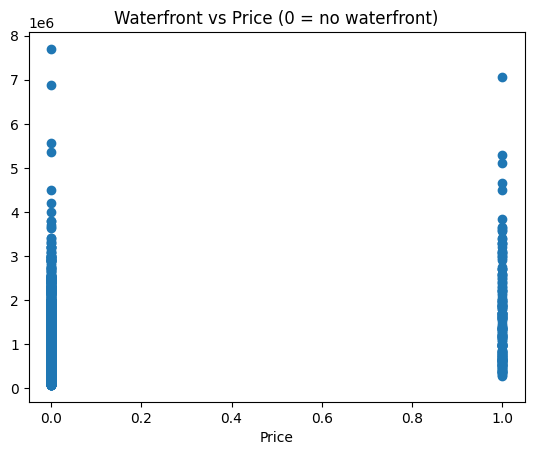

In [12]:
plt.scatter(data.waterfront, data.price)
plt.xlabel("Price")
plt.title("Waterfront vs Price (0 = no waterfront)")
plt.show()

6. Zip Code :

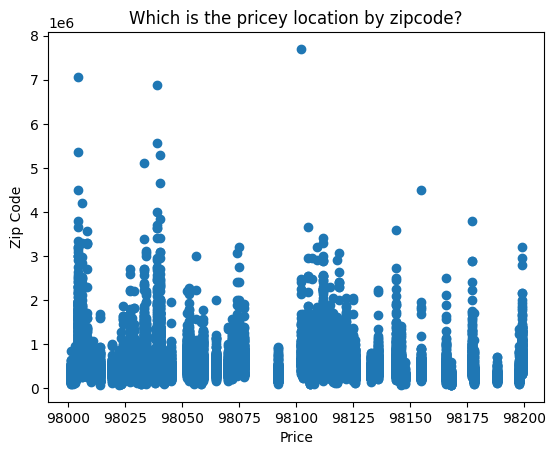

In [13]:
plt.scatter(data.zipcode,data.price)
plt.xlabel("Price")
plt.ylabel("Zip Code")
plt.title("Which is the pricey location by zipcode?")
plt.show()

#### Heatmap :
Pour nous assurer que nous avons couvert toutes les relations, nous traçons une corrélation entre toutes les caractéristiques en utilisant une heatmap.

Une heatmap est une représentation graphique bidimensionnelle des données où les valeurs individuelles contenues dans une matrice sont représentées par des couleurs.

<ipython-input-14-670025d86e39>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap=colormap)


<Axes: >

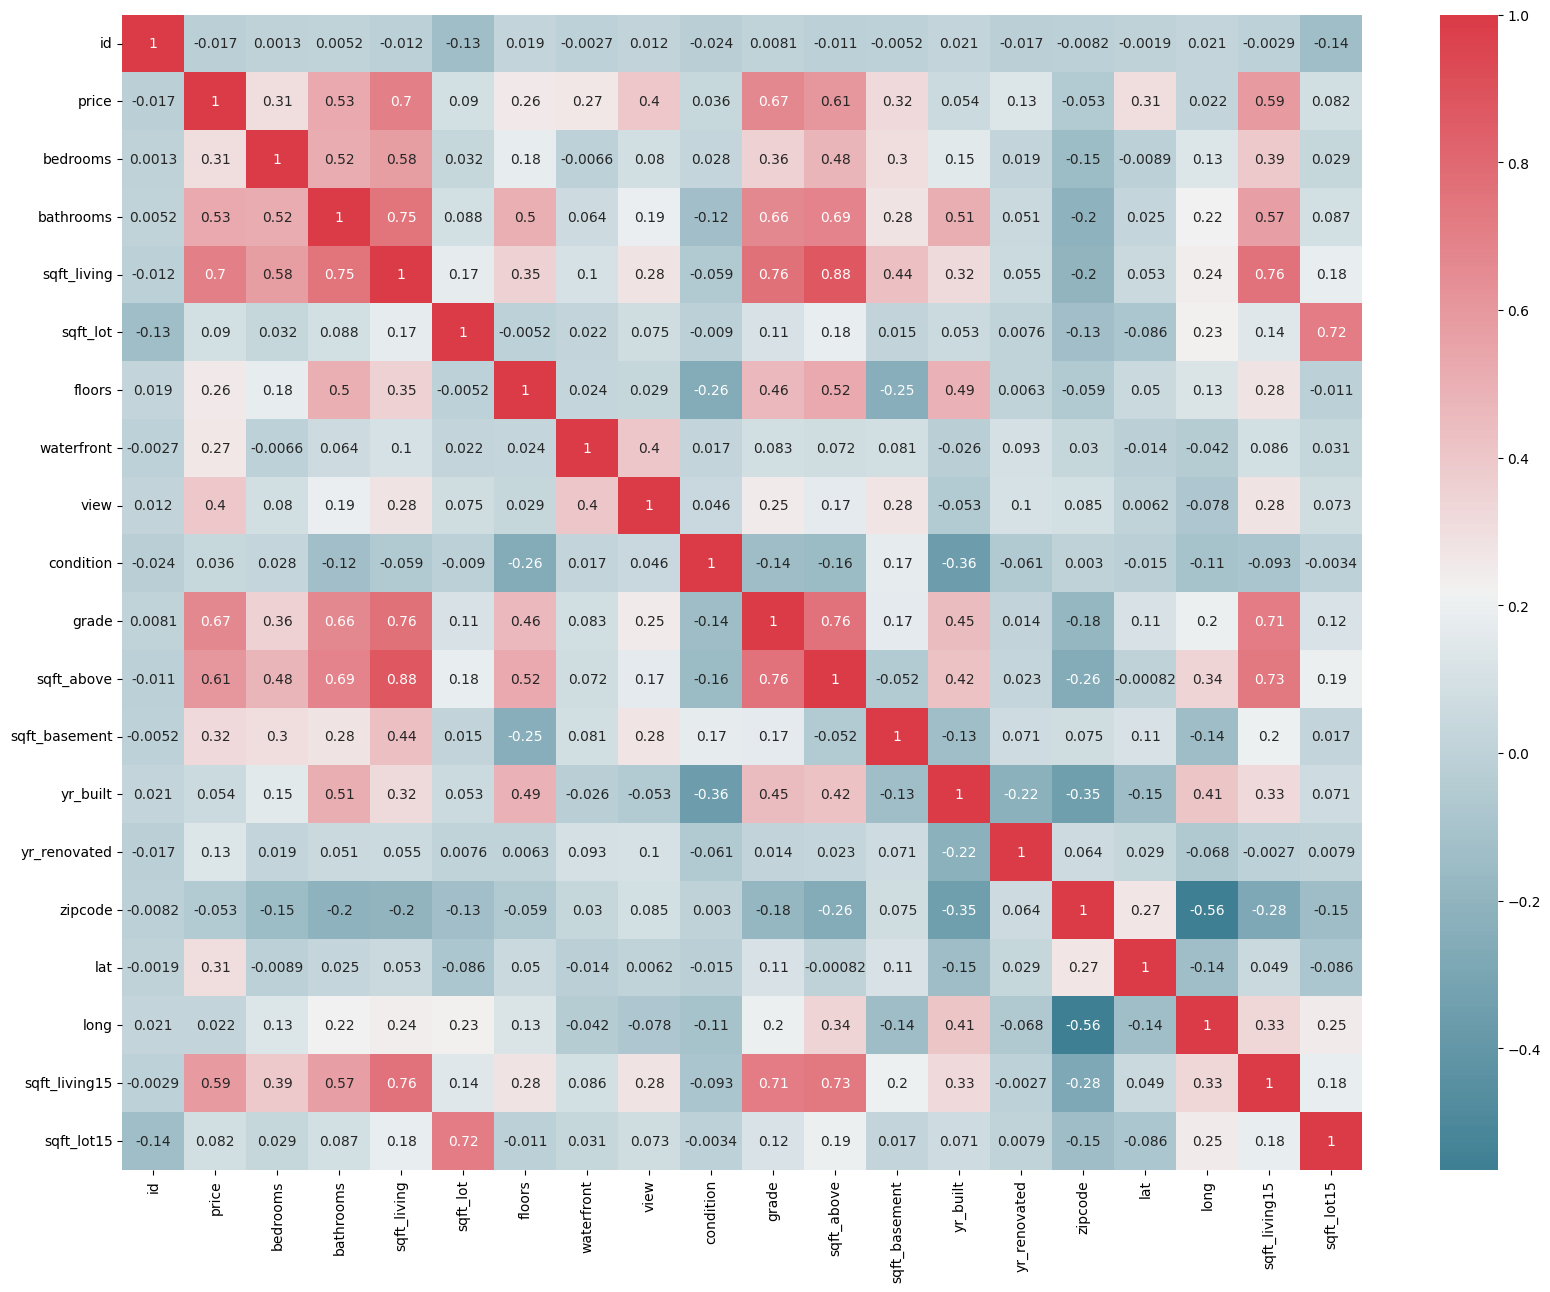

In [14]:
fig, ax = plt.subplots(figsize=(20, 15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), annot=True, cmap=colormap)

<Axes: xlabel='bathrooms', ylabel='price'>

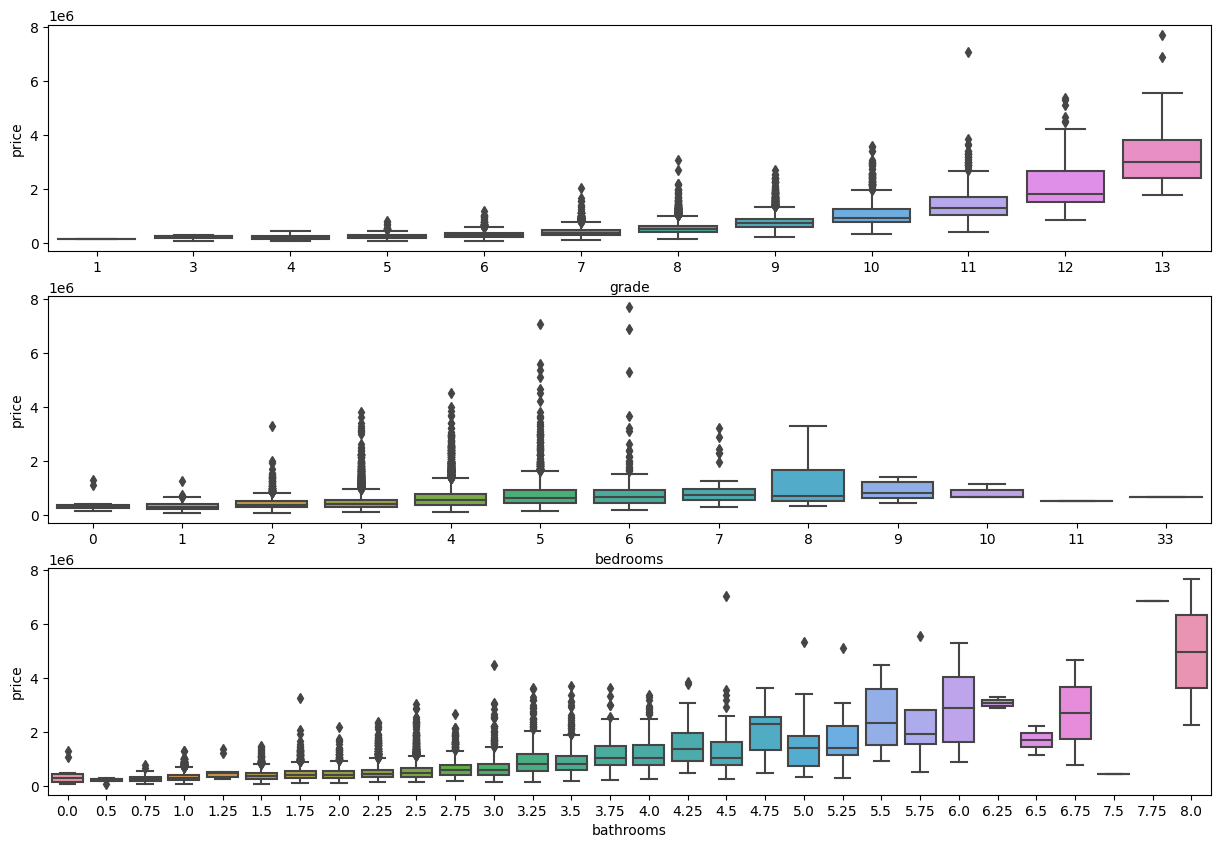

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(15,10))
sns.boxplot(x=data['grade'], y=data['price'], ax=ax[0])
sns.boxplot(x=data['bedrooms'], y=data['price'], ax=ax[1])

# _, axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=data['bathrooms'], y=data['price'])

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
labels = data['price']
conv_dates = [1 if values.startswith('2014') else 0 for values in data.date ]

data_cleaned = data.drop(['id', 'price'], axis=1)
data_cleaned['date'] = conv_dates

In [17]:
data_cleaned.tail()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,1,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data_cleaned, labels, test_size = 0.10, random_state =2)

reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.7335646231303242

In [21]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
          learning_rate=0.1, loss='squared_error')

In [22]:
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9215438711976082

In [23]:
predictions = clf.predict(x_test)
predictions[:10]

array([ 742052.33273373, 1470287.99906264,  429565.9517919 ,
        781338.57330415,  192180.94138751,  745399.55119849,
        429775.69543651,  578157.29871521,  454520.60447692,
        647521.74444079])

In [24]:
x_test[:10]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6638,0,4,2.25,2410,4250,1.5,0,0,5,7,1460,950,1929,0,98117,47.6849,-122.376,1360,5074
7366,1,3,1.50,2170,16600,1.0,1,2,3,10,1130,1040,1979,0,98052,47.6307,-122.088,3130,13875
3158,1,2,1.00,1450,6380,1.0,0,0,3,7,1450,0,1967,0,98115,47.6924,-122.321,1240,6380
9117,1,5,3.25,4500,9648,2.0,0,4,4,8,3000,1500,1968,0,98125,47.7262,-122.282,2780,21132
3392,0,2,1.00,860,6000,1.0,0,0,3,6,860,0,1945,0,98022,47.2109,-121.985,1300,6000
305,0,3,1.75,1920,3300,1.0,0,0,4,8,960,960,1913,0,98112,47.6239,-122.298,1740,4000
14462,1,3,1.50,2500,6000,1.5,0,0,5,7,1730,770,1941,1984,98106,47.5297,-122.354,1340,5000
6196,1,4,2.25,2380,35008,1.0,0,0,3,8,2380,0,1977,0,98075,47.5834,-122.001,2250,34794
10194,1,4,2.50,2330,9928,2.0,0,0,3,8,2330,0,1998,0,98045,47.4836,-121.783,2430,8175
13457,1,3,3.00,2180,2650,1.5,0,0,5,8,1410,770,1930,0,98117,47.6891,-122.375,1570,4820


In [25]:
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
